<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------

import numpy as np
import sys
sys.path.append('src')  # Agrega la carpeta 'src' al PATH
from src import support as sp  # Importa la función desde el archivo

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [2]:
df_knn=pd.read_csv("data/df_knn.csv",index_col=0)

In [3]:
df_knn.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
101054,2016-03-07 12:54:35,Volkswagen_Golf_1.9_TDI,private,offer,2600.0,test,other,2002.0,manually,129.0,golf,150000.0,8.0,diesel,volkswagen,no,2016-03-07 00:00:00,0.0,90443.0,2016-04-06 03:16:29
13624,2016-03-10 19:38:52,Volkswagen_Golf_1.9_TDI,private,offer,2400.0,control,other,2001.0,manually,129.0,golf,150000.0,3.0,diesel,volkswagen,no,2016-03-10 00:00:00,0.0,68766.0,2016-03-21 09:45:34
63959,2016-04-04 23:56:25,BMW_316i,private,offer,1850.0,control,coupe,1994.0,manually,101.0,3er,150000.0,6.0,petrol,bmw,no,2016-04-04 00:00:00,0.0,66346.0,2016-04-07 09:16:00
273221,2016-03-21 16:41:41,Audi_A6_Avant_2.5TDI_quattro,private,offer,2850.0,control,combi,2001.0,automatic,177.0,a6,150000.0,3.0,diesel,audi,no,2016-03-21 00:00:00,0.0,72175.0,2016-03-31 20:46:26
65139,2016-03-29 07:56:27,Ford_mondeo_ghia_2005_mit_43.000_km_umd_tuev_e...,private,offer,4850.0,test,other,2005.0,manually,123.0,mondeo,50000.0,2.5,petrol,ford,no,2016-03-29 00:00:00,0.0,10823.0,2016-04-05 18:18:23


In [4]:
df_knn2=df_knn.drop(columns=["postalCode","lastSeen","dateCreated","dateCrawled","name","nrOfPictures","monthOfRegistration","model"])

In [5]:
escalador_robust = RobustScaler()
suffix = "_robust"

# Selecciona solo las columnas numéricas
numeric_columns = df_knn2.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_knn2[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_knn2.index)

# Añade las nuevas columnas escaladas al DataFrame original
df1 = pd.concat([df_knn2, df_scaled], axis=1)

In [6]:
df1.head(1)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage,price_robust,yearOfRegistration_robust,powerCV_robust,kilometer_robust
0,private,offer,480.0,test,other,1993.0,manually,109.5,150000.0,petrol,volkswagen,desconocido,-0.43871,-1.222222,-0.050725,0.0


In [7]:
escalador_robust = MinMaxScaler()
suffix = "_minmax"

# Selecciona solo las columnas numéricas
numeric_columns = df_knn2.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_knn2[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_knn2.index)

# Añade las nuevas columnas escaladas al DataFrame original
df2 = pd.concat([df_knn2, df_scaled], axis=1)

In [8]:
df2.head(1)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage,price_minmax,yearOfRegistration_minmax,powerCV_minmax,kilometer_minmax
0,private,offer,480.0,test,other,1993.0,manually,109.5,150000.0,petrol,volkswagen,desconocido,0.00028,0.761468,0.154577,1.0


In [9]:
escalador_robust = Normalizer()
suffix = "_norm"

# Selecciona solo las columnas numéricas
numeric_columns = df_knn2.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_knn2[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_knn2.index)

# Añade las nuevas columnas escaladas al DataFrame original
df3 = pd.concat([df_knn2, df_scaled], axis=1)

In [10]:
df3.head(1)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage,price_norm,yearOfRegistration_norm,powerCV_norm,kilometer_norm
0,private,offer,480.0,test,other,1993.0,manually,109.5,150000.0,petrol,volkswagen,desconocido,0.0032,0.013285,0.00073,0.999906


In [11]:
escalador_robust = StandardScaler()
suffix = "_stds"

# Selecciona solo las columnas numéricas
numeric_columns = df_knn2.select_dtypes(include=[np.number]).columns

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_knn2[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_knn2.index)

# Añade las nuevas columnas escaladas al DataFrame original
df4 = pd.concat([df_knn2, df_scaled], axis=1)

In [12]:
df4.head(1)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage,price_stds,yearOfRegistration_stds,powerCV_stds,kilometer_stds
0,private,offer,480.0,test,other,1993.0,manually,109.5,150000.0,petrol,volkswagen,desconocido,-0.442409,-1.395623,-0.226538,0.613011


In [13]:
df_list=[df1,df2,df3,df4]

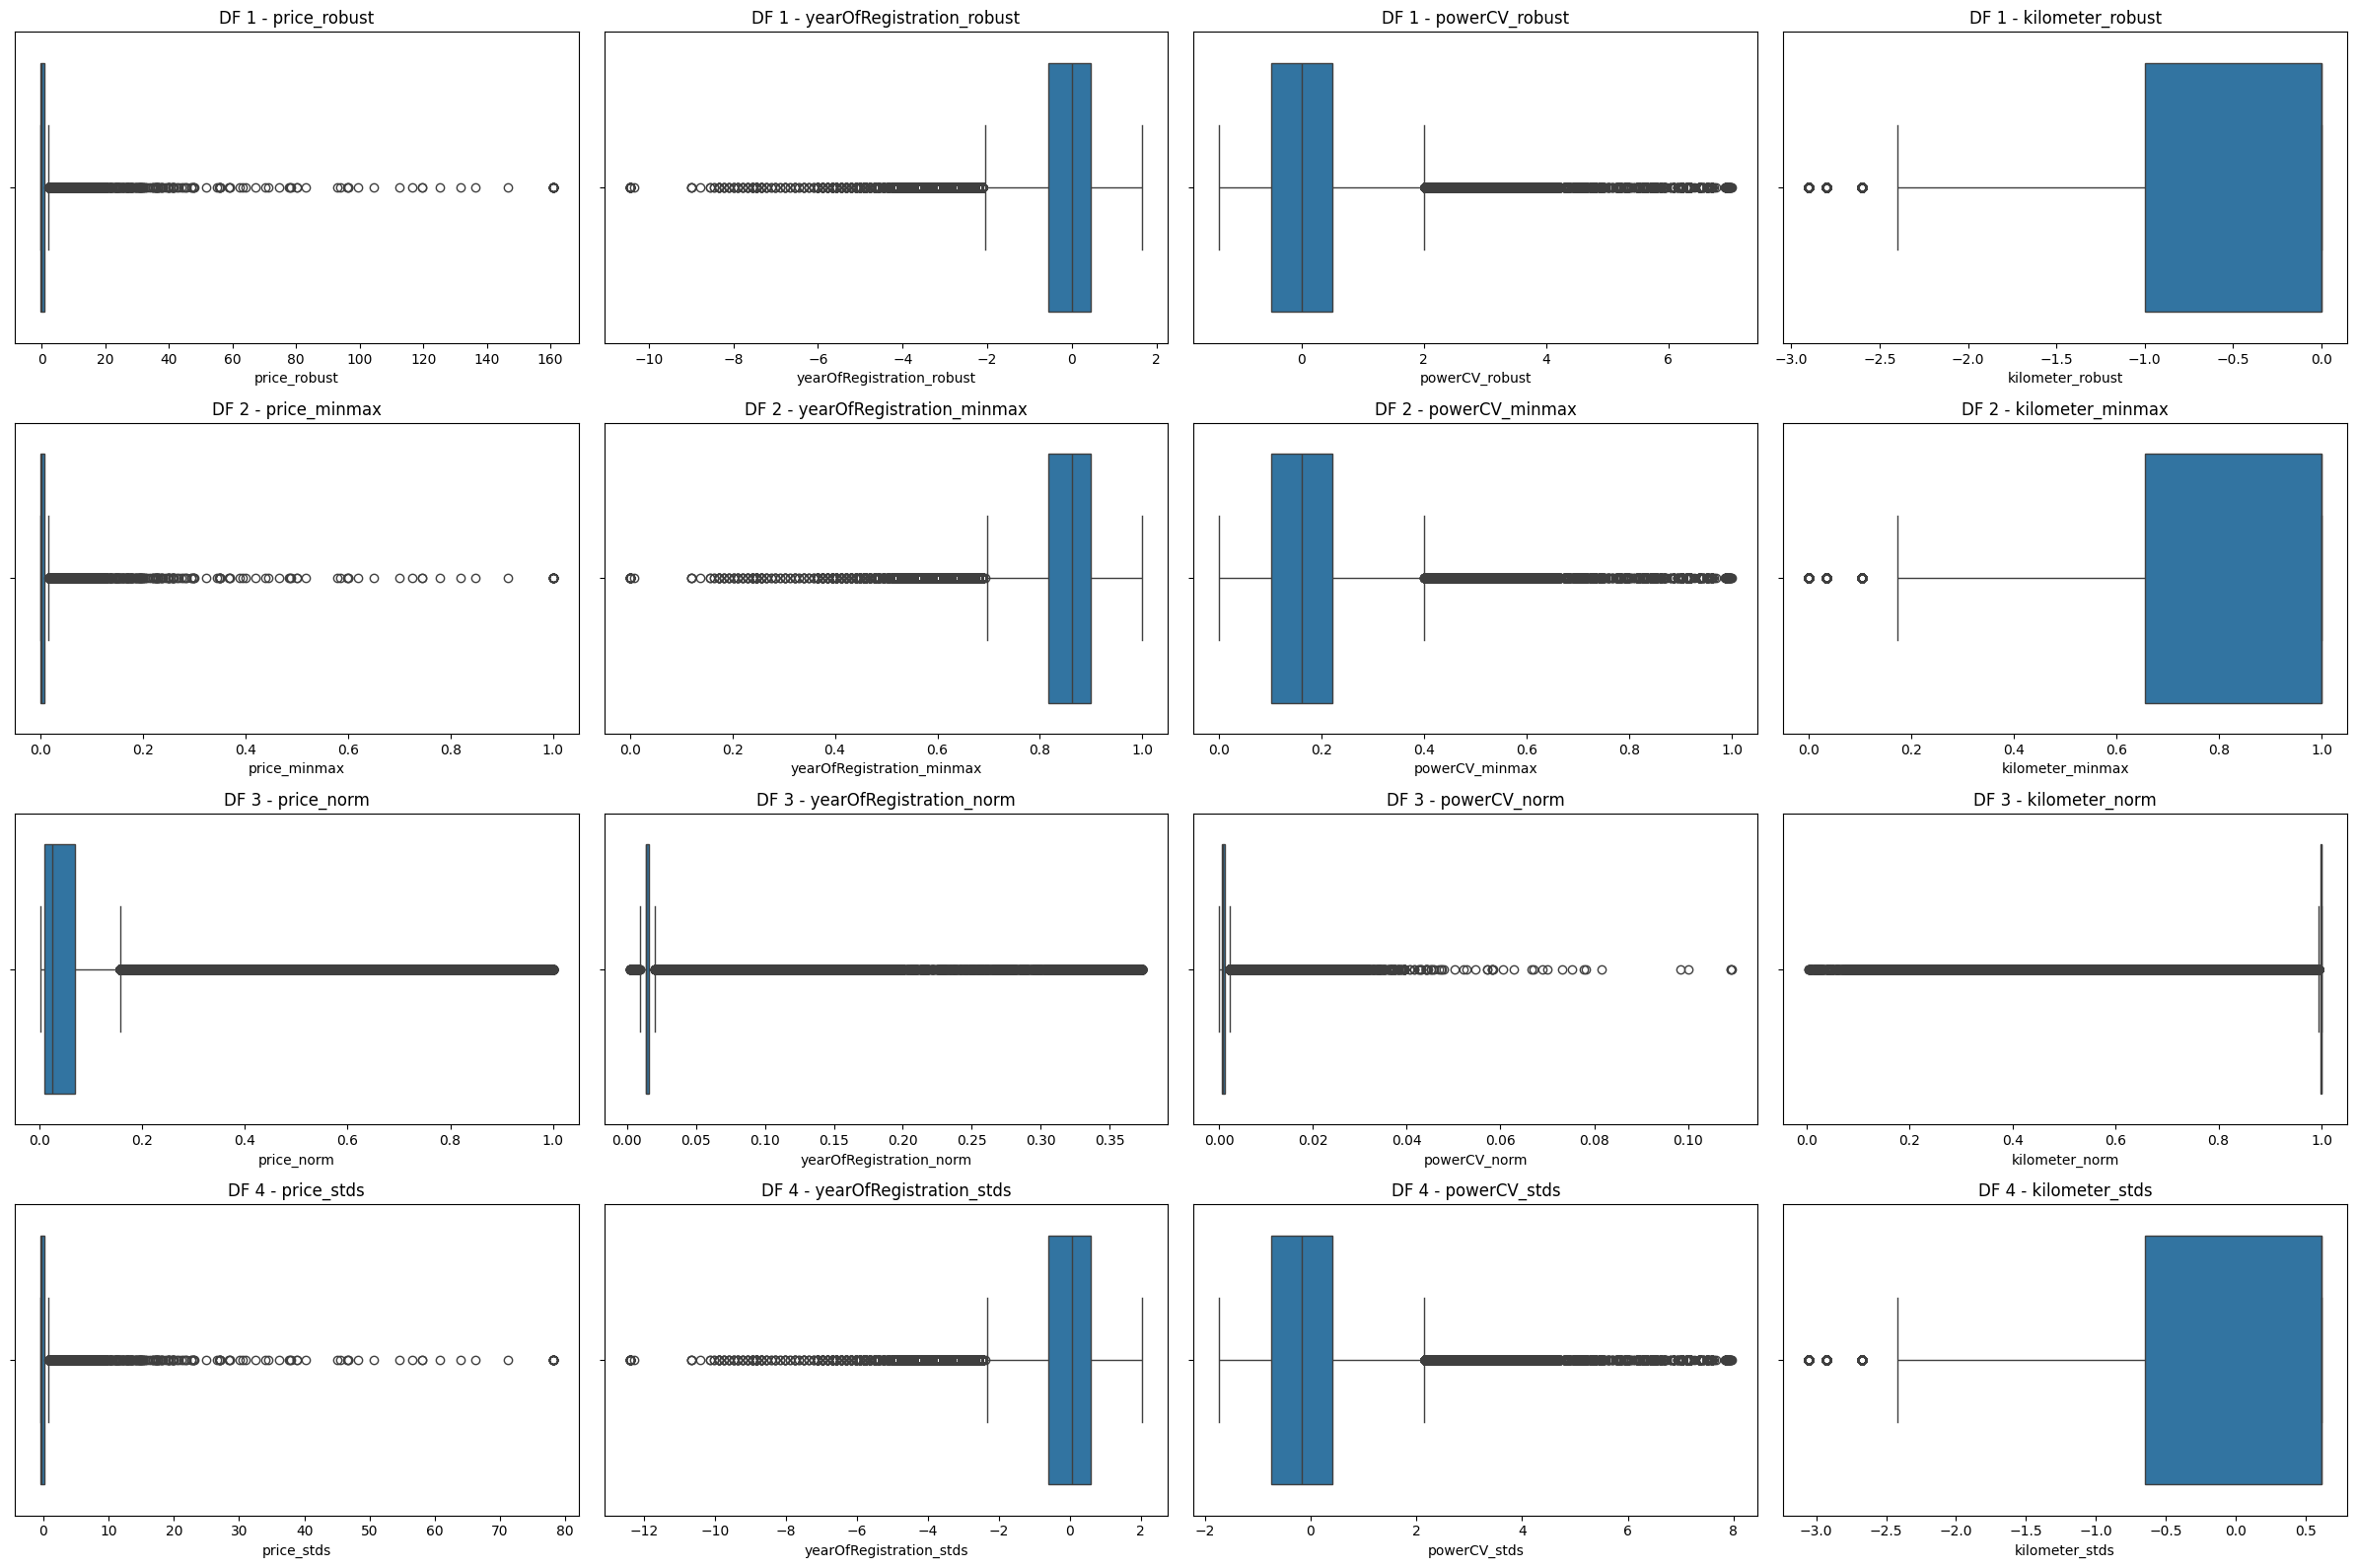

In [14]:
sp.generador_boxplots(df_list)